In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

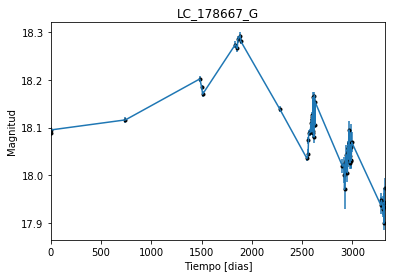

In [2]:
data = np.genfromtxt('LC_178667_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_178667_G')
plt.savefig("LC_178667_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

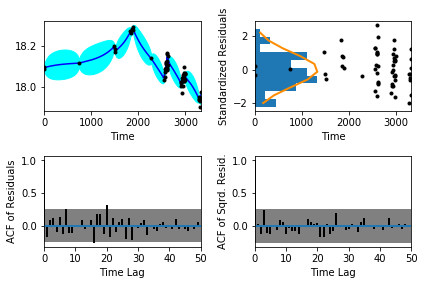

In [5]:
sample.assess_fit()

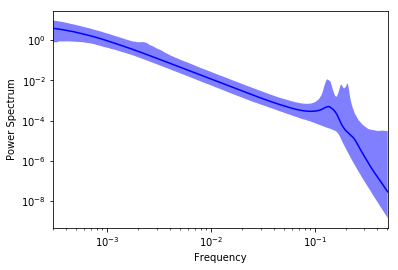

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

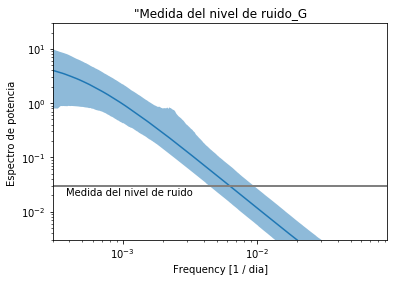

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_178667_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_178667_G')

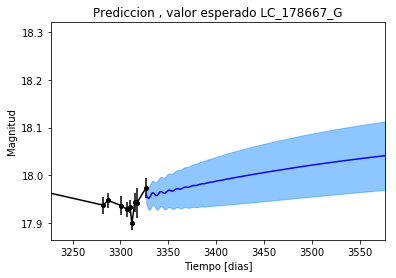

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_178667_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_178667_G')

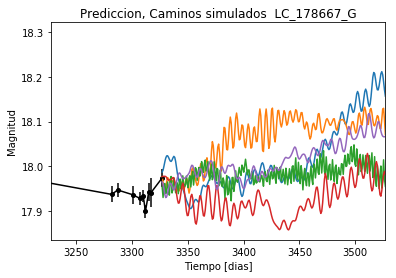

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_178667_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


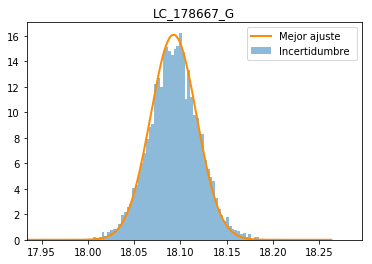

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_178667_G')
plt.savefig("Mejor_ajuste_LC_178667_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_178667_G')

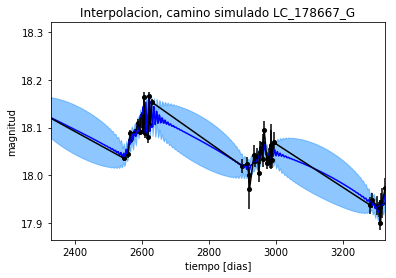

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_178667_G')

Text(0.5,1,'Interpolacion, camino simulado LC_178667_G')

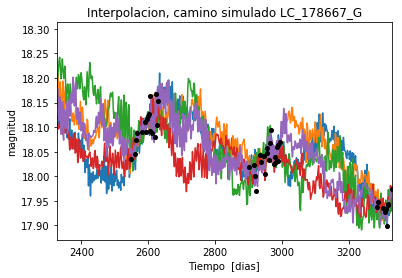

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_178667_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 346.263860347
Median: 0.00689007521311
Standard deviation: 0.0421820014712
68% credibility interval: [ 0.00307595  0.01325912]
95% credibility interval: [ 0.00136059  0.03101487]
99% credibility interval: [ 0.00069343  0.22124659]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 346.263860347
Median: 0.00689007521311
Standard deviation: 0.0421820014712
68% credibility interval: [ 0.00307595  0.01325912]
95% credibility interval: [ 0.00136059  0.03101487]
99% credibility interval: [ 0.00069343  0.22124659]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 188.955418594
Median: 0.453471629043
Standard deviation: 0.289749957822
68%

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 190.758968459
Median: 140.936177195
Standard deviation: 2.4559238188
68% credibility interval: [ 138.48841823  142.96645592]
95% credibility interval: [ 135.33310197  145.56664614]
99% credibility interval: [ 133.04181464  146.03011828]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 175.804168021
Median: 3.01883910584
Standard deviation: 1.90847626757
68% credibility interval: [ 1.01665261  5.22216091]
95% credibility interval: [ 0.09928849  6.23826726]
99% credibility interval: [ 0.04825913  6.52960803]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 152.685579903
Median: 1.46086007282
Standard deviation: 11.7965252161
68% credibility interval: [  0.86928038  29.21009893]
95% credibility interval: [  0.68730126  3

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 585.692838409
Median: 8.55374982616e-24
Standard deviation: 8.48498753341e+53
68% credibility interval: [  6.79095892e-63   1.59126604e-01]
95% credibility interval: [  1.77183485e-89   1.07343296e+21]
99% credibility interval: [  1.63358824e-154   2.75193052e+047]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 650.809832293
Median: 18.1064936131
Standard deviation: 0.0460123172941
68% credibility interval: [ 18.06486068  18.1471214 ]
95% credibility interval: [ 18.01543428  18.19758759]
99% credibility interval: [ 17.97803945  18.23350178]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 152.211038303
Median: 0.173548802461
Standard deviation: 0.274128111469
68% credibility interval: [ 0.13333096  0.83972826]
95% credibility interval: [ 0.12656865  0.87884579]
99% credibility interval: [ 0.12332581  0.8907833 ]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 152.211038303
Median: 0.173548802461
Standard deviation: 0.274128111469
68% credibility interval: [ 0.13333096  0.83972826]
95% credibility interval: [ 0.12656865  0.87884579]
99% credibility interval: [ 0.12332581  0.8907833 ]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 15051.2522549
Median: 0.0
Standard deviation: 0.00307966817808
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 190.758968459
Median: 140.936177195
Standard deviation: 2.4559238188
68% credibility interval: [ 138.48841823  142.96645592]
95% credibility interval: [ 135.33310197  145.56664614]
99% credibility interval: [ 133.04181464  146.03011828]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 960.874254184
Median: 0.00860176447331
Standard deviation: 0.00608522683878
68% credibility interval: [ 0.00609138  0.0125666 ]
95% credibility interval: [ 0.00431224  0.01967378]
99% credibility interval: [ 0.00365321  0.03815512]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 783.482877505
Median: 1.04316080903
Standard deviation: 0.221156161316
68% credibility interval: [ 0.86183716  1.28056395]
95% credibility interval: [ 0.71848532  1.61633811]
99% credibility interval: [ 0.65862408  1.79160263]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 214.569042554
Median: 0.0200806675851
Standard deviation: 0.370138710713
68% credibility interval: [ 0.00567155  0.39139908]
95% credibility interval: [  8.78293410e-24   1.16513526e+00]
99% credibility interval: [  1.02057471e-48   1.41389418e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 346.263860347
Median: (-0.0432916193444-0.833682312069j)
Standard deviation: 1.74266999198
68% credibility interval: [-0.08330951-1.1672089j  -0.01932675-5.47909634j]
95% credibility interval: [-0.19487217-4.28823289j -0.00854886-0.84769572j]
99% credibility interval: [-1.39013335-2.43204633j -0.00435692-6.30028612j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 346.263860347
Median: (-0.0432916193444+0.833682312069j)
Standard deviation: 1.74266999198
68% credibility interval: [-0.08330951+1.1672089j  -0.01932675+5.47909634j]
95% credibility interval: [-0.19487217+4.28823289j -0.00854886+0.84769572j]
99% credibility interval: [-1.39013335+2.43204633j -0.00435692+6.30028612j]
Posterior summary for parameter ar_roots  